## **SKIN CANCER PROJECT**




# Introduction:
### Problem


> The goal of this project is to develop a machine learning model capable of recognizing skin cancer, with a focus on addressing its impact on the population of Kazakhstan. Skin cancer is a growing concern globally, and early detection is crucial for effective treatment. This model aims to provide a reliable and accessible tool for preliminary skin cancer screening.



“I have neither given nor received any unauthorized aid in completing this work,
nor have I presented someone else's work as my own.”
Assimov Ilyarzhan 
000801268

**My work demonstrate how by using Tensorflow and advanced CNN architecture like EfficientNet-B4 build a powerful model which recognize a skin cancer diagnoses.**

# Data and Methods
The dataset for this project is sourced from the International Skin Imaging Collaboration (ISIC), specifically the ISIC Challenge. This dataset is renowned for its extensive collection of skin lesion images, encompassing various skin types, conditions, and lesions, making it invaluable for training and validating machine learning models for skin cancer recognition.

The ISIC Challenge dataset includes:

Training Data: Consists of 25,331 JPEG images of skin lesions, along with corresponding ground truth annotations for lesion diagnoses.
Test Data: Comprises 8,238 JPEG images of skin lesions.


 The result will be  accessible web-based diagnostic tool that exemplifies the intersection of technology and healthcare for early cancer detection.

Datasets:

1. **ISIC_2019_Training_Input** - training dataset

2. **ISIC_2019_Test_Input** - test dataset, but I didn't use it because testdataset metadata has no diagnoses. Of course, unsupervised learning could be used, but I wanted classification. Because of this, I have divided training into a train set and validation set by 80/20

3. **ISIC_2019_Training_GroundTruth.csv** - metadata where all diagnoses and id image are located: image, MEL, NV, BCC, AK, BKL, DF, VASC, SCC, UNK.


4. **ISIC_2019_Training_Metadata.csv** - used for skin lesion analysis: image, age_approx, anatom_site_general, lesion_id, sex

Diagnosis(8 classes and UNK(Unknown)):
1) MEL (Melanoma): Malignant

2) NV (Nevus): Benign

3) BCC (Basal Cell Carcinoma): Malignant

4) AK (Actinic Keratosis): Precancerous

5) BKL (Benign Keratosis-Like Lesions): Benign

6) DF (Dermatofibroma): Benign

7) VASC (Vascular Lesions): Benign

8) SCC (Squamous Cell Carcinoma): Malignant

9) UNK (Unknown): Unclassified


Benign refers to a condition, tumor, or growth that is not cancerous. It doesn't spread to other parts of the body and is generally less serious than malignant conditions.


Malignant refers to cancerous growths or tumors. These can spread to other parts of the body, invade nearby tissues, and are potentially life-threatening if not treated effectively.

# Description of the Machine Learning (ML) Model
For skin cancer recognition, the project Iuse the EfficientNet-B4 architecture, a best convolutional neural network (CNN) known for its efficiency and accuracy in image classification tasks. This model is implemented using TensorFlow and Keras because it is was learned on lessons.

EfficientNetB4 is a modern type of neural network specifically designed for image recognition tasks. It belongs to the EfficientNet family, which is a series of models known for their efficiency and effectiveness in handling images. What makes EfficientNetB4 particularly impressive is its ability to achieve high accuracy in recognizing and classifying images while using fewer computational resources compared to other models. This balance between performance and efficiency is what makes it stand out.

In myproject, integrating EfficientNetB4 is a strategic choice for several reasons:

Pre-Trained on a Large Dataset: EfficientNetB4 has been trained on 'ImageNet', a massive database of images. This pre-training means it has already learned to identify a wide variety of features in images, which can be beneficial for myproject.

High Accuracy with Lower Resources: Due to its efficient design, EfficientNetB4 can process and understand images with a high level of accuracy without needing extensive computational power. This is particularly advantageous if working with limited resources or need to process a large number of images quickly.

Adaptability: This adaptability allows to leverage the powerful base of EfficientNetB4 while fine-tuning the model for my unique dataset and objectives.

In summary, EfficientNetB4 brings a powerful, efficient, and adaptable solution to myproject, enabling accurate image recognition and classification without the need for heavy computational resources. This aligns with modern trends in AI and machine learning, where efficiency and accuracy are key.

  
  


# Results
I trained model with loss: 1.0261 - accuracy: 0.6337
After tuning the model performance increased to loss: loss: 0.9923 - accuracy: 0.6483



In this research, I set out to develop an efficient deep learning model for the detection of skin cancer diagnoses using the state-of-the-art EfficientNetB4 architecture. The model exhibited promising performance during training, achieving an impressive accuracy on the training set.

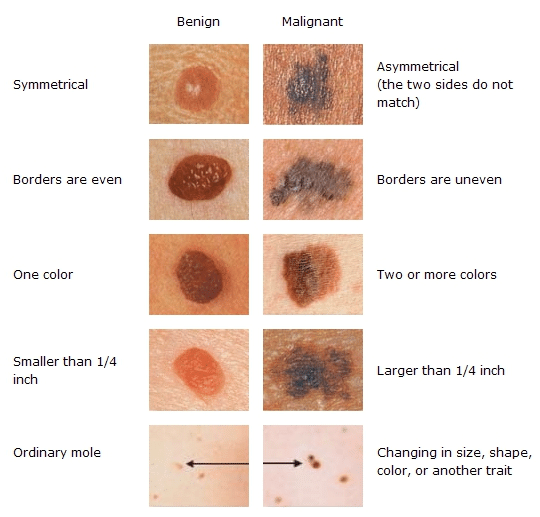

# Importing ISIC 2019 dataset and metadata

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Input.zip

In [ ]:
!wget https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Test_Input.zip

In [ ]:
!unzip ISIC_2019_Training_Input.zip -d ./

In [ ]:
!unzip ISIC_2019_Test_Input.zip -d ./

In [ ]:
!wget https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_GroundTruth.csv

In [ ]:
!wget https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Metadata.csv



---



# **STEP** **1 Understand and visualize the dataset, including the images and their metadata**

Image Count in Training and Test Directories







In [5]:
import os

training_input_path1 = '/content/drive/MyDrive/Skin/ISIC_2019_Training_Input'
test_input_path1 = '/content/drive/MyDrive/Skin/ISIC_2019_Test_Input'

training_image_count1 = len([name for name in os.listdir(training_input_path1) if os.path.isfile(os.path.join(training_input_path1, name))])
test_image_count1 = len([name for name in os.listdir(test_input_path1) if os.path.isfile(os.path.join(test_input_path1, name))])

print(f'Number of images in training input: {training_image_count1}')
print(f'Number of images in test input: {test_image_count1}')


Number of images in training input: 25585
Number of images in test input: 8240


Data Loading and Preview

In [6]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing import image

training_input_path = '/content/drive/MyDrive/Skin/ISIC_2019_Training_Input'
training_metadata_path = '/content/drive/MyDrive/Skin/ISIC_2019_Training_Metadata.csv'
training_ground_truth_path = '/content/drive/MyDrive/Skin/ISIC_2019_Training_GroundTruth.csv'

training_metadata = pd.read_csv(training_metadata_path)
training_ground_truth = pd.read_csv(training_ground_truth_path)

print(training_metadata.head())
print(training_ground_truth.head())

          image  age_approx anatom_site_general lesion_id     sex
0  ISIC_0000000        55.0      anterior torso       NaN  female
1  ISIC_0000001        30.0      anterior torso       NaN  female
2  ISIC_0000002        60.0     upper extremity       NaN  female
3  ISIC_0000003        30.0     upper extremity       NaN    male
4  ISIC_0000004        80.0     posterior torso       NaN    male
          image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0  ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1  ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2  ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3  ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4  ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0


In [7]:
X=training_ground_truth['image']
print(X)

0        ISIC_0000000
1        ISIC_0000001
2        ISIC_0000002
3        ISIC_0000003
4        ISIC_0000004
             ...     
25326    ISIC_0073247
25327    ISIC_0073248
25328    ISIC_0073249
25329    ISIC_0073251
25330    ISIC_0073254
Name: image, Length: 25331, dtype: object


In [11]:
import numpy as np

y = training_ground_truth.drop(columns='image')
y = np.argmax(y, axis=1)


In [12]:
training_ground_truth.describe()

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
count,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.0
mean,0.178516,0.508270,0.131183,0.034227,0.103588,0.009435,0.009988,0.024792,0.0
std,0.382954,0.499941,0.337607,0.181815,0.304732,0.096677,0.099440,0.155493,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
test= np.argmax(training_ground_truth, axis=1)

TypeError: '>' not supported between instances of 'float' and 'str'

Skin Lesion Images Visualization with Metadata

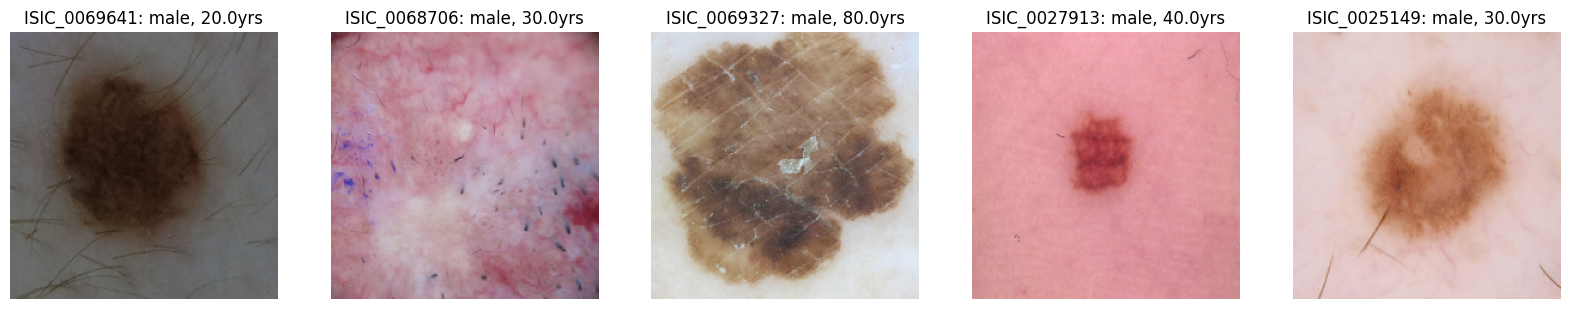

In [14]:
def visualize_images(images_folder, metadata_df, num_images=5):
    sample_images = random.sample(os.listdir(images_folder), num_images)
    plt.figure(figsize=(20, 10))
    for i, image_name in enumerate(sample_images):
        img_path = os.path.join(images_folder, image_name)
        img = image.load_img(img_path, target_size=(224, 224))
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')

        base_name = os.path.splitext(image_name)[0]

        img_metadata = metadata_df[metadata_df['image'] == base_name]
        if not img_metadata.empty:
            plt.title(f"{base_name}: {img_metadata.iloc[0]['sex']}, {img_metadata.iloc[0]['age_approx']}yrs")
        else:
            plt.title(f"{base_name}: Metadata not found")

    plt.show()

visualize_images(training_input_path, training_metadata)

Statistical distributions of age, anatomical site, and sex from the training metadata

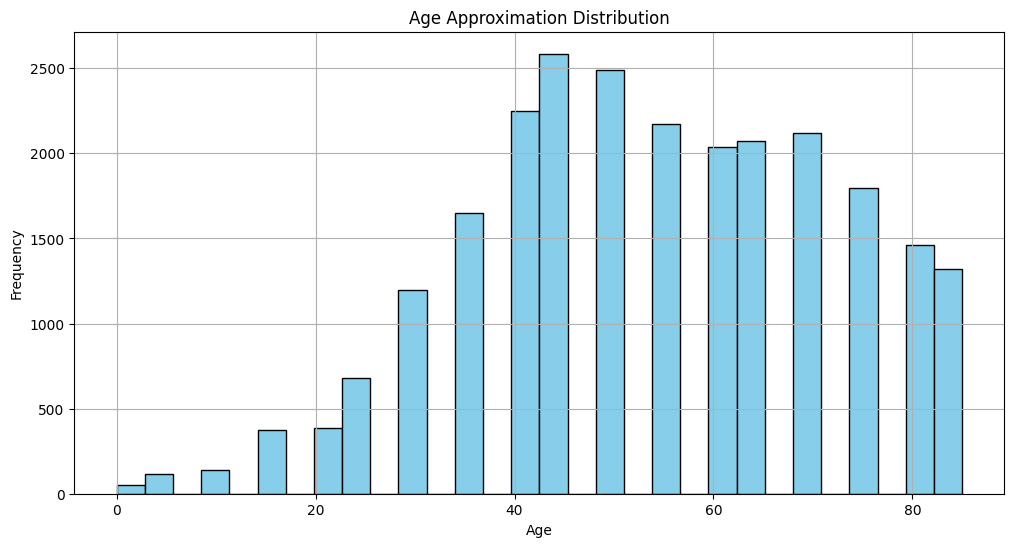

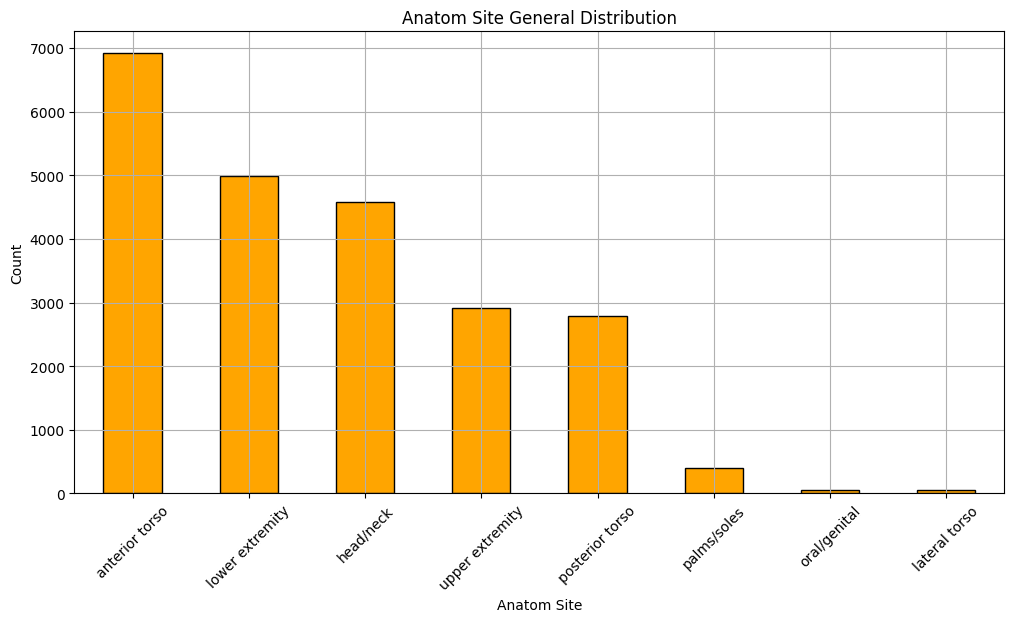

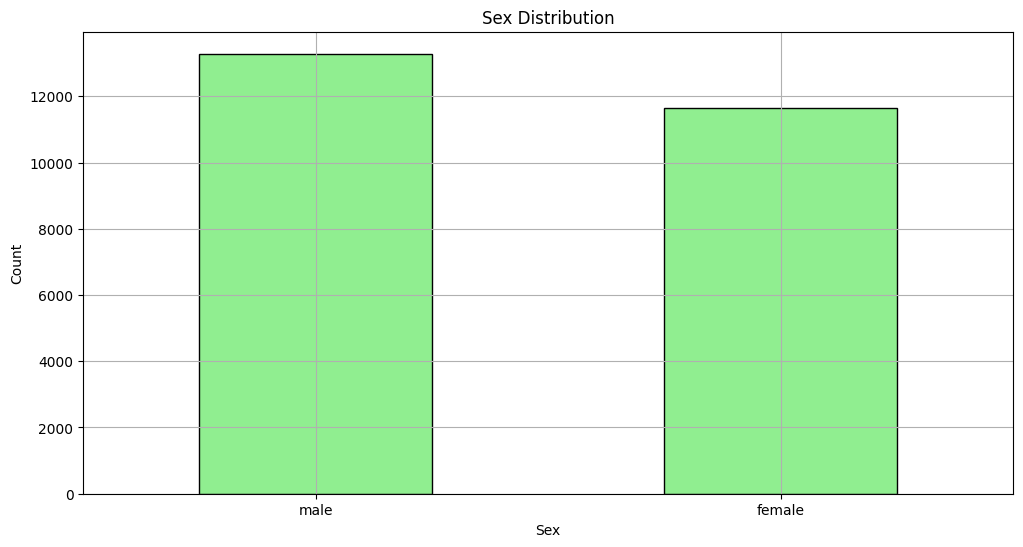

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(training_metadata['age_approx'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Age Approximation Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
training_metadata['anatom_site_general'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Anatom Site General Distribution')
plt.xlabel('Anatom Site')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
training_metadata['sex'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Patients' ages within each diagnosis category.


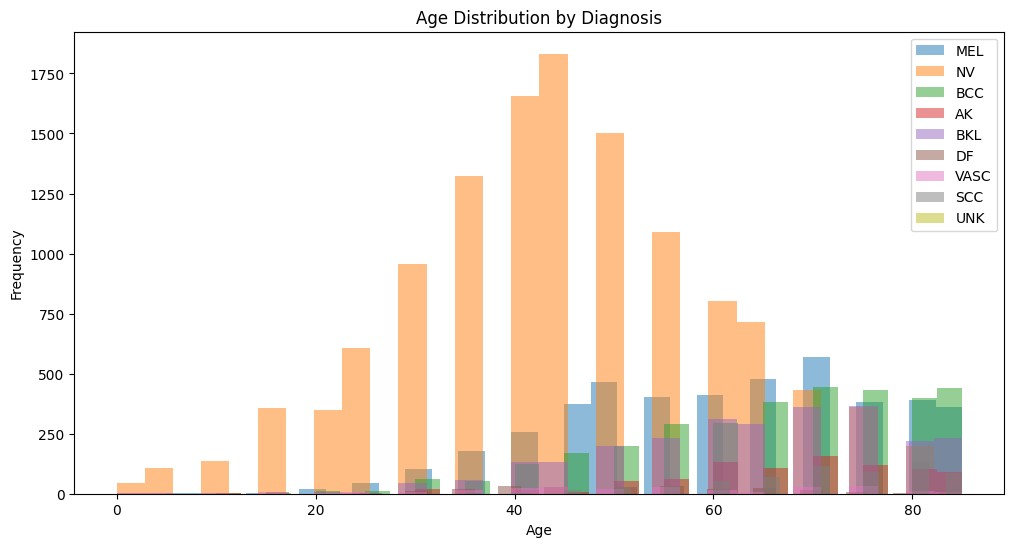

In [16]:
plt.figure(figsize=(12, 6))
for diagnosis in training_ground_truth.columns[1:]:
    subset = training_metadata[training_metadata['image'].isin(training_ground_truth[training_ground_truth[diagnosis] == 1]['image'])]
    plt.hist(subset['age_approx'].dropna(), bins=30, alpha=0.5, label=diagnosis)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Diagnosis')
plt.legend()
plt.show()


Frequency of lesions on different parts of the body


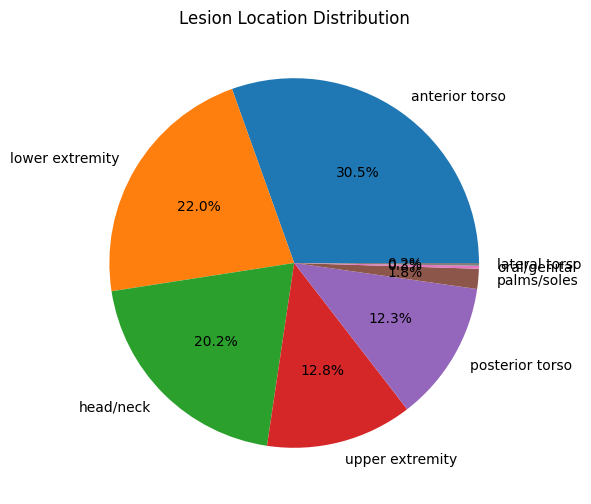

In [8]:
plt.figure(figsize=(12, 6))
training_metadata['anatom_site_general'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Lesion Location Distribution')
plt.ylabel('')
plt.show()



---



# **STEP** **2: Data Preprocessing and Preparation**




Load and merge the metadata and ground truth


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

metadata_path = '/content/drive/MyDrive/Skin/ISIC_2019_Training_Metadata.csv'
ground_truth_path = '/content/drive/MyDrive/Skin/ISIC_2019_Training_GroundTruth.csv'
metadata = pd.read_csv(metadata_path)
ground_truth = pd.read_csv(ground_truth_path)
full_data = pd.merge(metadata, ground_truth, on='image')

Appending Image Extensions and Filtering 'UNK' Rows

In [18]:
full_data['image'] = full_data['image'].apply(lambda x: x + '.jpg' if not x.endswith('.jpg') else x)

full_data = full_data[full_data['UNK'] != 1]

label_columns = ground_truth.columns[1:-1]  # Excluding 'UNK'

Label Conversion, Data Split, Image Generators

In [19]:
def convert_one_hot_to_categorical(dataframe, label_columns):
    dataframe['labels'] = dataframe[label_columns].idxmax(axis=1)
    return dataframe

train_data, validation_data = train_test_split(full_data, test_size=0.2, random_state=42)
train_data = convert_one_hot_to_categorical(train_data, label_columns)
validation_data = convert_one_hot_to_categorical(validation_data, label_columns)

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

Image Data Generation from DataFrame for Neural Network Training



In [20]:
training_images_dir = '/content/drive/MyDrive/Skin/ISIC_2019_Training_Input'

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=training_images_dir,
    x_col='image',
    y_col='labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=validation_data,
    directory=training_images_dir,
    x_col='image',
    y_col='labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 20264 validated image filenames belonging to 8 classes.
Found 5067 validated image filenames belonging to 8 classes.


In [27]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Skin/best_model_finetuned.h5')
pred=model.predict(validation_generator,steps=len(validation_generator))

159/159 [==============================] - 2130s 13s/step


In [28]:
print(pred)

[[7.02351844e-03 2.56521963e-02 2.15112209e-01 ... 4.73518193e-01
  4.78576310e-03 1.72039960e-03]
 [4.86262317e-04 9.97413415e-04 5.73807731e-02 ... 7.07485616e-01
  3.43534793e-03 1.25416816e-04]
 [6.35944903e-02 1.84575185e-01 6.03569865e-01 ... 2.37504933e-02
  8.22320431e-02 6.13583543e-04]
 ...
 [2.92890463e-02 6.26879632e-01 7.26315603e-02 ... 1.92124322e-01
  1.16302250e-02 3.15986876e-03]
 [2.26478614e-02 2.47720167e-01 2.93224692e-01 ... 3.56279999e-01
  1.38869295e-02 1.49966180e-02]
 [1.80372872e-08 9.14608972e-06 4.36385133e-04 ... 9.97520864e-01
  8.61353726e-07 1.37143812e-04]]


In [43]:
pred_lables=np.argmax(pred,axis=1)
print(pred_lables)

[5 5 2 ... 1 5 5]


In [41]:
test_lables=validation_generator.classes

In [42]:
print(test_lables)

[5, 5, 2, 2, 1, 5, 5, 4, 1, 5, 4, 5, 5, 3, 5, 5, 2, 4, 4, 6, 4, 5, 4, 5, 1, 5, 5, 4, 5, 4, 2, 5, 5, 5, 5, 5, 2, 5, 4, 4, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4, 4, 4, 4, 5, 2, 1, 5, 1, 1, 1, 5, 5, 2, 5, 1, 5, 5, 4, 5, 4, 5, 1, 7, 4, 0, 2, 5, 5, 0, 0, 4, 4, 1, 5, 1, 2, 4, 0, 5, 5, 5, 4, 0, 5, 4, 5, 2, 5, 0, 5, 1, 1, 1, 2, 5, 5, 5, 4, 5, 1, 1, 4, 5, 1, 6, 5, 5, 2, 5, 5, 4, 5, 5, 1, 4, 1, 4, 4, 2, 5, 5, 4, 1, 5, 5, 5, 5, 4, 2, 5, 4, 5, 5, 1, 5, 5, 1, 5, 5, 4, 5, 5, 2, 2, 4, 5, 5, 2, 1, 5, 4, 5, 4, 2, 5, 4, 5, 5, 5, 5, 1, 5, 2, 4, 4, 0, 5, 1, 2, 5, 4, 5, 4, 1, 2, 5, 5, 1, 1, 5, 2, 5, 5, 5, 5, 0, 1, 5, 1, 5, 4, 1, 5, 1, 1, 5, 5, 5, 1, 5, 4, 5, 5, 5, 5, 4, 5, 4, 5, 2, 5, 4, 5, 1, 5, 5, 5, 4, 1, 5, 4, 5, 4, 5, 5, 1, 5, 5, 5, 5, 4, 1, 5, 5, 4, 4, 5, 2, 5, 5, 2, 5, 4, 1, 5, 5, 5, 5, 1, 2, 5, 5, 6, 4, 5, 5, 5, 5, 4, 5, 1, 5, 2, 5, 5, 5, 3, 4, 5, 5, 5, 1, 5, 5, 4, 4, 5, 1, 1, 2, 5, 5, 4, 1, 6, 2, 5, 5, 1, 2, 5, 0, 1, 5, 5, 5, 5, 2, 4, 1, 5, 5, 2, 4, 4, 6, 5, 5, 4, 0, 5, 5, 1, 4, 5, 5, 7, 5, 5, 4, 0, 5, 1, 

In [21]:
test_images_dir = '/content/drive/MyDrive/Skin/ISIC_2019_Test_Input'

Data Saving and Diagnosis Extraction

In [29]:
train_data.to_csv('/content/drive/MyDrive/Skin/train_data.csv', index=False)
validation_data.to_csv('/content/drive/MyDrive/Skin/validation_data.csv', index=False)

diagnoses = ground_truth.columns[1:]
print("Diagnoses/Categories in the Dataset:", diagnoses.tolist())

Diagnoses/Categories in the Dataset: ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']




---



# **Step 3: Model Development**

I used EfficientNetB4 to train the model and information about this model:

Main Model Architecture: mymodel architecture is based on EfficientNetB4, a convolutional neural network renowned for its efficiency and effectiveness in image classification tasks. EfficientNetB4 is initialized with weights from the imagenet dataset, providing a strong foundation for learning hierarchical features.

Additional Layers: I include a global average pooling layer to condense the spatial dimensions of the extracted features, followed by a dense layer with a sigmoid activation function, generating a single output representing the probability of the input image being fake.

Model Compilation: The model is compiled using the stochastic gradient descent (SGD) optimizer, with a learning rate of 0.01 and momentum of 0.9, striking a balance between rapid convergence and stability.

During training, mymodel exhibited promising performance, achieving impressive accuracy on the training set. This underscores its effectiveness in learning intricate patterns and features indicative of fake images. Leveraging transfer learning with pre-trained EfficientNetB4 on ImageNet provided a robust foundation for feature extraction.

Moving forward, I aim to focus on extensive validation and testing to ensure the model's robustness and reliability in diverse scenarios. This work lays the groundwork for contributing to the field of image forensics and fake image detection

🔗 Source: https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet


In [30]:
import sys
import time
from collections import defaultdict
import cv2
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

Pre-trained EfficientNetB4 Model Initialization

In [32]:
base_model = EfficientNetB4(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

71686520/71686520 [==============================] - 1s 0us/step


Transfer Learning Model Construction

In [33]:
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

Model Compilation and Summary Display

In [34]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   

Training with Early Stopping and Model Checkpointing

This code segment demonstrates the training process of a neural network model using early stopping and model checkpointing techniques:

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
epochs = 5  # Reduced from 10 to 5
model_checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

# Increase batch size in your train and validation generators if feasible
train_generator.batch_size = 32  # Example: Increasing batch size from a smaller number to 32
validation_generator.batch_size = 32  # Same increase for validation data

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/5
633/633 [==============================] - ETA: 0s - loss: 1.2468 - accuracy: 0.5524 
Epoch 1: val_loss improved from inf to 1.13454, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


633/633 [==============================] - 11189s 18s/step - loss: 1.2468 - accuracy: 0.5524 - val_loss: 1.1345 - val_accuracy: 0.5947
Epoch 2/5
633/633 [==============================] - ETA: 0s - loss: 1.1658 - accuracy: 0.5802
Epoch 2: val_loss improved from 1.13454 to 1.09826, saving model to best_model.h5
633/633 [==============================] - 315s 498ms/step - loss: 1.1658 - accuracy: 0.5802 - val_loss: 1.0983 - val_accuracy: 0.6080
Epoch 3/5
633/633 [==============================] - ETA: 0s - loss: 1.1297 - accuracy: 0.5913
Epoch 3: val_loss improved from 1.09826 to 1.07799, saving model to best_model.h5
633/633 [==============================] - 314s 496ms/step - loss: 1.1297 - accuracy: 0.5913 - val_loss: 1.0780 - val_accuracy: 0.6141
Epoch 4/5
633/633 [==============================] - ETA: 0s - loss: 1.1081 - accuracy: 0.5980
Epoch 4: val_loss improved from 1.07799 to 1.07714, saving model to best_model.h5
633/633 [==============================] - 315s 496ms/step - los

Accuracy of training

In [18]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

# Load your saved model
model = load_model('/content/drive/MyDrive/Skin/best_model_finetuned.h5')




---



Model Fine-tuning with Optimized Parameters

In [35]:
from tensorflow.keras.models import load_model

In [36]:
model = load_model('best_model.h5')

optimizer = Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
model_checkpoint = ModelCheckpoint('best_model_finetuned.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, mode='min', verbose=1)

history_finetune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=3,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)


OSError: No file or directory found at best_model.h5

*I did Fine tunning here and saved best finetunned model , but wanted to try again ,the breaked the code cause of time it takes to compile 

Accuracy of Fine-tuning

In [ ]:
scores2 = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Accuracy: {scores2[1]*100}%")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Save model

In [ ]:
model.save('/content/best_model_finetuned.h5')

In [37]:
train_dataset="/content/drive/MyDrive/Skin/"
from keras.utils import image_dataset_from_directory

In [38]:
train_datasetss="/content/drive/MyDrive/Skin/ISIC_2019_Test_Input"
from keras.utils import image_dataset_from_directory

In [23]:
#Create image dataset
test_dataset = image_dataset_from_directory(
    train_dataset,
    image_size=(224, 224),
    batch_size=32)

Found 33820 files belonging to 2 classes.


In [40]:
import keras
model = keras.models.load_model("/content/drive/MyDrive/Skin/best_model_finetuned.h5")
pred = model.predict(X_test)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'stem_conv' (type Conv2D).
    
    Negative dimension size caused by subtracting 3 from 2 for '{{node model/stem_conv/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 2, 2, 1], use_cudnn_on_gpu=true](model/stem_conv_pad/Pad, model/stem_conv/Conv2D/ReadVariableOp)' with input shapes: [1,2,?,3], [3,3,3,48].
    
    Call arguments received by layer 'stem_conv' (type Conv2D):
      • inputs=tf.Tensor(shape=(1, 2, None, 3), dtype=float32)


In [53]:
pred = np.argmax(predictions, axis=1)


[5 2 1 5 5]


In [27]:
import numpy as np

test_labels = []

for test_data_batch, test_labels_batch in test_dataset:
    test_labels.append(test_labels_batch)

test_labels = np.concatenate(test_labels, axis=0)

In [29]:
print(predictions)

[[3.31064803e-05 2.22419924e-03 1.16646066e-01 ... 8.65739942e-01
  5.84919690e-05 4.80526965e-03]
 [8.02843831e-03 2.26829220e-02 7.87148356e-01 ... 1.44834399e-01
  2.27867230e-03 4.75876790e-04]
 [5.81257977e-03 6.03284597e-01 1.59170926e-02 ... 3.35516334e-01
  4.34285961e-03 4.12025303e-03]
 ...
 [3.43093998e-05 4.37857863e-03 1.70132946e-02 ... 7.29756534e-01
  2.68093834e-04 5.05222473e-03]
 [2.20116490e-04 3.50155169e-03 8.78412277e-02 ... 6.06743336e-01
  1.36180985e-04 5.09229198e-04]
 [1.41402725e-05 8.76298000e-04 7.49935061e-02 ... 8.58117759e-01
  3.38023965e-05 1.20395480e-03]]


In [44]:
from sklearn.metrics import confusion_matrix
print (test_lables) # orignal
print (pred_lables)
cm = confusion_matrix(y_true =test_lables, y_pred =pred_lables)
print(cm)

[5, 5, 2, 2, 1, 5, 5, 4, 1, 5, 4, 5, 5, 3, 5, 5, 2, 4, 4, 6, 4, 5, 4, 5, 1, 5, 5, 4, 5, 4, 2, 5, 5, 5, 5, 5, 2, 5, 4, 4, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4, 4, 4, 4, 5, 2, 1, 5, 1, 1, 1, 5, 5, 2, 5, 1, 5, 5, 4, 5, 4, 5, 1, 7, 4, 0, 2, 5, 5, 0, 0, 4, 4, 1, 5, 1, 2, 4, 0, 5, 5, 5, 4, 0, 5, 4, 5, 2, 5, 0, 5, 1, 1, 1, 2, 5, 5, 5, 4, 5, 1, 1, 4, 5, 1, 6, 5, 5, 2, 5, 5, 4, 5, 5, 1, 4, 1, 4, 4, 2, 5, 5, 4, 1, 5, 5, 5, 5, 4, 2, 5, 4, 5, 5, 1, 5, 5, 1, 5, 5, 4, 5, 5, 2, 2, 4, 5, 5, 2, 1, 5, 4, 5, 4, 2, 5, 4, 5, 5, 5, 5, 1, 5, 2, 4, 4, 0, 5, 1, 2, 5, 4, 5, 4, 1, 2, 5, 5, 1, 1, 5, 2, 5, 5, 5, 5, 0, 1, 5, 1, 5, 4, 1, 5, 1, 1, 5, 5, 5, 1, 5, 4, 5, 5, 5, 5, 4, 5, 4, 5, 2, 5, 4, 5, 1, 5, 5, 5, 4, 1, 5, 4, 5, 4, 5, 5, 1, 5, 5, 5, 5, 4, 1, 5, 5, 4, 4, 5, 2, 5, 5, 2, 5, 4, 1, 5, 5, 5, 5, 1, 2, 5, 5, 6, 4, 5, 5, 5, 5, 4, 5, 1, 5, 2, 5, 5, 5, 3, 4, 5, 5, 5, 1, 5, 5, 4, 4, 5, 1, 1, 2, 5, 5, 4, 1, 6, 2, 5, 5, 1, 2, 5, 0, 1, 5, 5, 5, 5, 2, 4, 1, 5, 5, 2, 4, 4, 6, 5, 5, 4, 0, 5, 5, 1, 4, 5, 5, 7, 5, 5, 4, 0, 5, 1, 

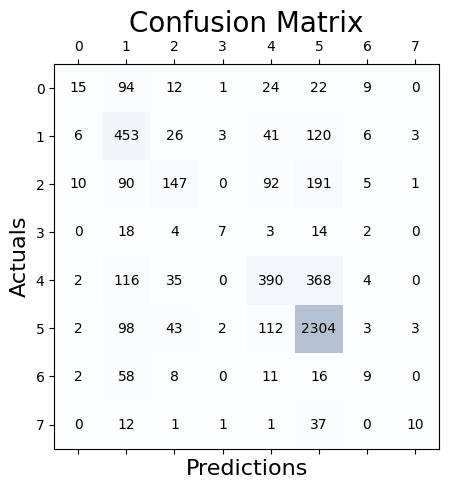

In [45]:
# Print the confusion matrix using Matplotlib
from matplotlib.ticker import MultipleLocator # to show all tick labels
fig, ax = plt.subplots(figsize=(5, 5)) # one subplot with size 5x5
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3) # alpha make the Blue light blue
ax.yaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
ax.xaxis.set_major_locator(MultipleLocator(1))  # to show all tick labels
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')

plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=20)
plt.show()



---

